In [40]:
import os
import glob
from nilearn import image
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import nibabel as nib
from nilearn import plotting
from nilearn import datasets
import scipy.io
from scipy import stats
from copy import deepcopy
import time
import nibabel as nib
import sklearn
import nibabel
from nibabel import processing
import matplotlib.colors as colors
from scipy import stats
import random
import copy
import pandas as pd
from nilearn import datasets
from nilearn.glm import cluster_level_inference
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from nilearn.glm import threshold_stats_img
from nilearn.reporting import get_clusters_table
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import index_img
from nilearn.image import get_data, math_img

## read in GLM maps

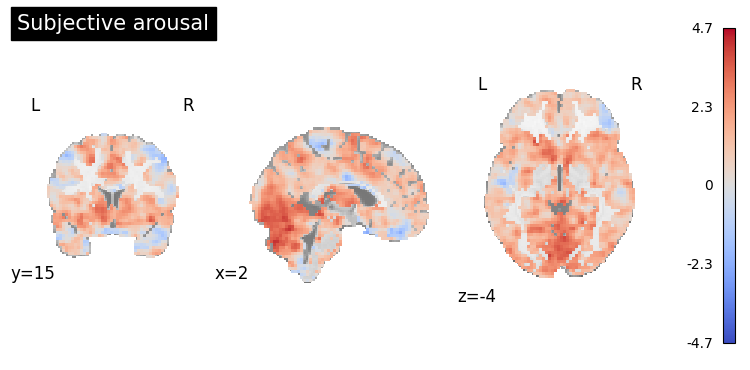

In [41]:
file='./model27_param_arous_30z.nii.gz'
glm27_func_nii = nib.load(file)
affine = glm27_func_nii.affine
glm27_func_data = glm27_func_nii.get_fdata()
glm27_func_data=glm27_func_data[:,:,:,0,1]
glm27_func_data[np.round(glm27_func_data,17)==0]=np.nan
glm27_func_nii = nib.Nifti1Image(glm27_func_data,affine)  # Create the volume image.

plotting.plot_stat_map(glm27_func_nii, title="Subjective arousal", 
                                 display_mode="ortho", 
                       cmap="coolwarm",
                       cut_coords = (2,15,-4), draw_cross = False)

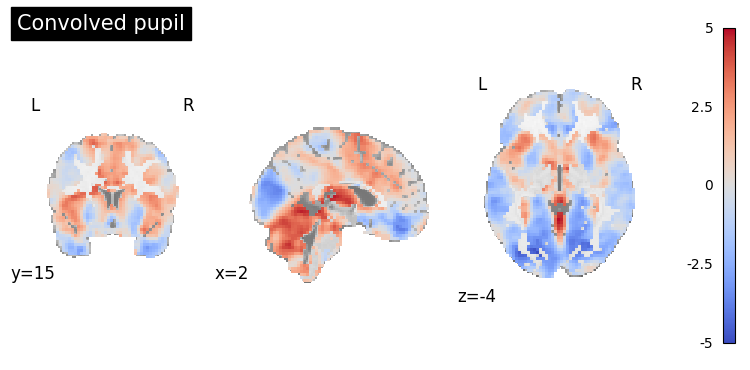

In [42]:
file='./model33b_pupil_scaled_convolved_24z.nii.gz'
glm33b_func_nii = nib.load(file)
affine = glm33b_func_nii.affine
glm33b_func_data = glm33b_func_nii.get_fdata()
glm33b_func_data=glm33b_func_data[:,:,:,0,1]
glm33b_func_data[np.round(glm33b_func_data,17)==0]=np.nan
glm33b_func_nii = nib.Nifti1Image(glm33b_func_data,affine)  # Create the volume image.

plotting.plot_stat_map(glm33b_func_nii, title="Convolved pupil", 
                                 display_mode="ortho", 
                       cmap="coolwarm",
                       cut_coords = (2,15,-4), draw_cross = False)

# plotting.plot_glass_brain(glm33b_func_nii, threshold = 2, colorbar=True,plot_abs=False,title="Convolved pupil")

## do the conjunction analysis (the AFNI way)

In [73]:
#conjunction of pupil and subjective arousal
!3dcalc -overwrite -prefix conjunction_arousal_pupil -a model33b_pupil_scaled_convolved_24z.nii.gz'[1]' -b model27_param_arous_30z.nii.gz'[1]' -expr 'step(a-1.96) + 2*step(b-1.96)'
!3dAFNItoNIFTI -prefix conjunction_arousal_pupil.nii.gz conjunction_arousal_pupil+tlrc

#conjunction of PA and NA
!3dcalc -overwrite -prefix conjunction_PA_NA -a model24_param_posarous_30z.nii.gz'[1]' -b model25_param_negarous_30z.nii.gz'[1]' -expr 'step(a-1.96) + 2*step(b-1.96)'
!3dAFNItoNIFTI -prefix conjunction_PA_NA.nii.gz conjunction_PA_NA+tlrc

!3dcalc -overwrite -prefix conjunction_arousal_pupil_NE -a model33b_pupil_scaled_convolved_24z.nii.gz'[1]' -b model27_param_arous_30z.nii.gz'[1]' -c Markello_neuromaps/source-ding2010_desc-mrb_space-MNI152_res-2.9mm_feature.nii.gz'[0]' -expr 'step(a-1.96) + 2*step(b-1.96)+ 4*step(c-0)'
!3dAFNItoNIFTI -prefix conjunction_arousal_pupil_NE.nii.gz conjunction_arousal_pupil_NE+tlrc

file='./conjunction_arousal_pupil.nii.gz'
conj_func_nii = nib.load(file)
conj_func_data = conj_func_nii.get_fdata()
conj_func_data[conj_func_data<3]=0
conj_func_nii = nib.Nifti1Image(conj_func_data,affine)  # Create the volume image.

conj_func_nii,threshold = threshold_stats_img(
    conj_func_nii,
    height_control = None,
    threshold = 0.1,
    cluster_threshold=10,
)

nib.save(conj_func_nii, 'conjunction_arousal_pupil.nii.gz')
!3drefit -space MNI conjunction_arousal_pupil.nii.gz

++ 3dcalc: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: A cast of thousands
++ 3dAFNItoNIFTI: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ 3dcalc: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: A cast of thousands
++ 3dAFNItoNIFTI: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ 3dcalc: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: A cast of thousands
++ 3dAFNItoNIFTI: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ 3drefit: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: RW Cox
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/yanyan/Desktop/midaffemo/glm_maps/conjunction_arousal_pupil.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
++ Processing AFNI dataset conjunction_arousal_pupil.nii.gz
*+ WARNING: Changing the space of an ORIG view dataset may cause confusion!
*+ WARNING:  NIFTI copie

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



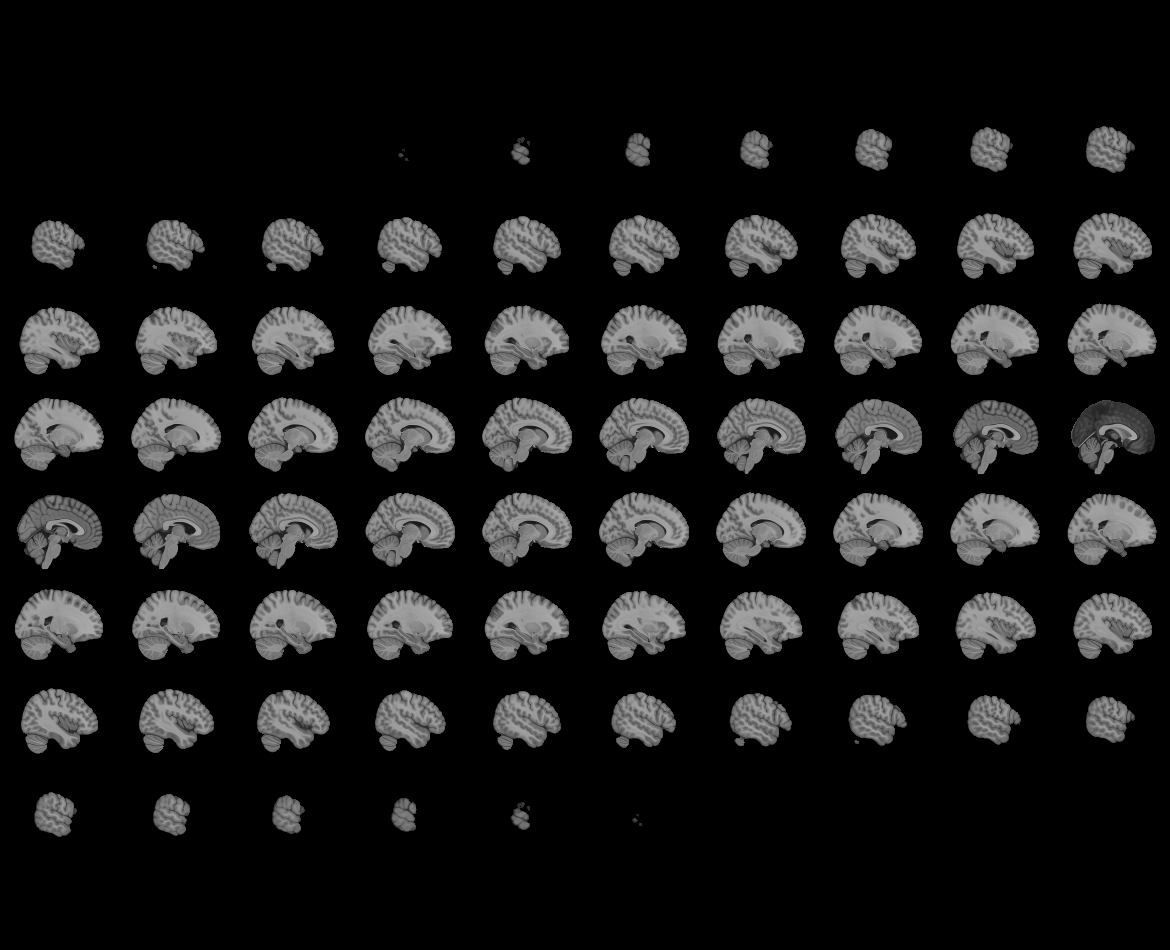
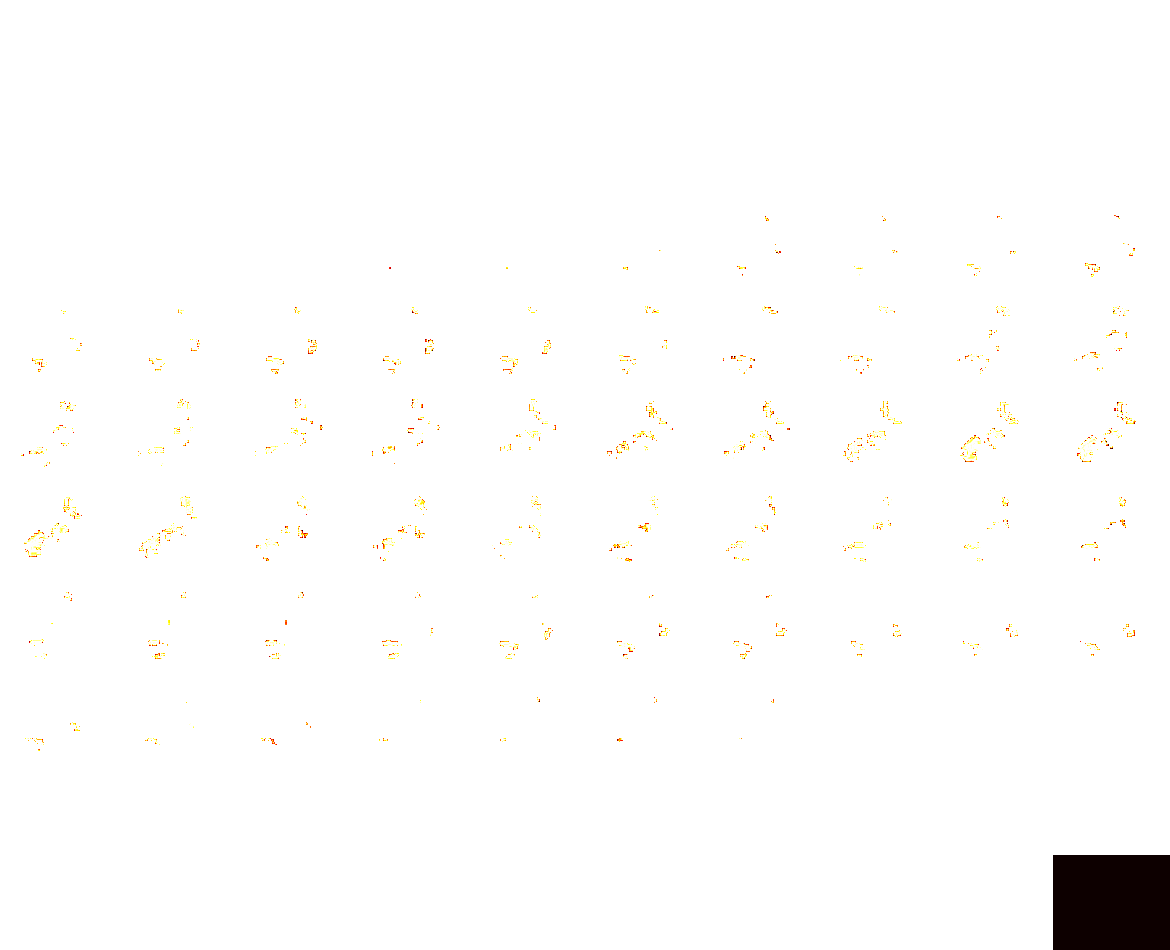

In [74]:
plotting.view_img(conj_func_nii)

## Do the conjunction analysis according to Nichols 2005 (simplified -- no permutation)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nilearn/plotting/img_plotting.py:1283: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nilearn/image/image.py:939: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  img_data = safe_get_data(img, ensure_finite=True, copy_data=copy)


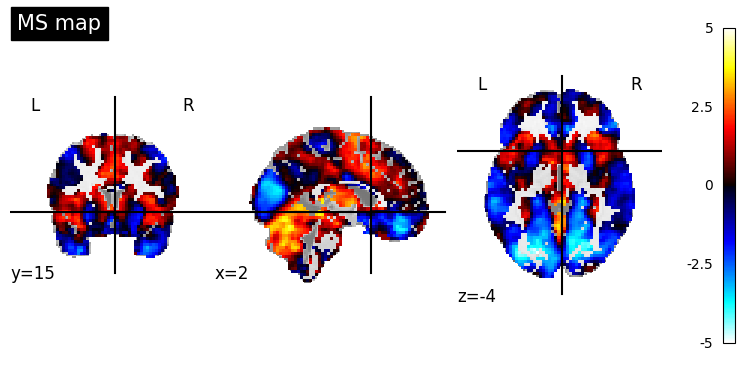

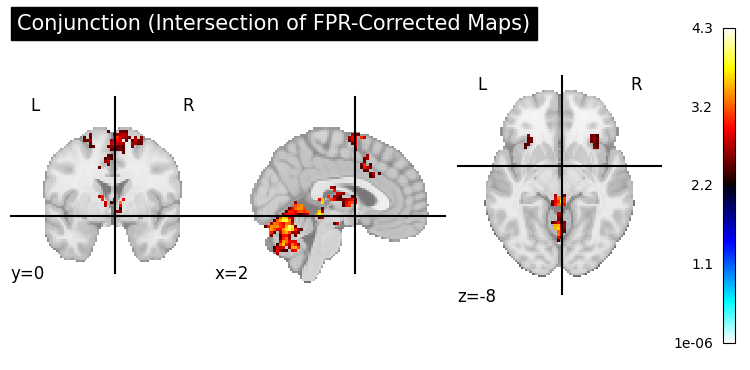

++ 3drefit: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: RW Cox
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/yanyan/Desktop/midaffemo/glm_maps/conjunction_arousal_pupil_nilearn.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
++ Processing AFNI dataset conjunction_arousal_pupil_nilearn.nii.gz
*+ WARNING: Changing the space of an ORIG view dataset may cause confusion!
*+ WARNING:  NIFTI copies will be interpreted as TLRC view (not TLRC space).
*+ WARNING:  Consider changing the view of the dataset to TLRC view also
 + loading and re-writing dataset conjunction_arousal_pupil_nilearn.nii.gz (/Users/yanyan/Desktop/midaffemo/glm_maps/conjunction_arousal_pupil_nilearn.nii.gz in NIFTI storage)
++ 3drefit processed 1 datasets
++ 3drefit: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: RW Cox
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /U

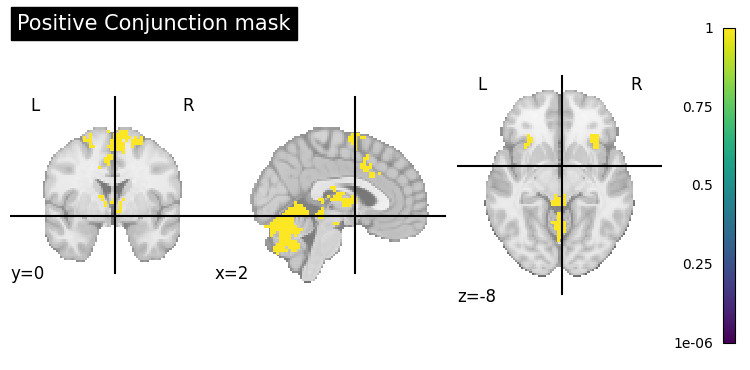

In [87]:
min_z_map = image.math_img('np.minimum(z1, z2)', z1=glm27_func_nii, z2=glm33b_func_nii)
plotting.plot_stat_map(
    min_z_map,
    title='MS map',
    cut_coords = (2,15,-4)
)

pos_conj_map, threshold1 = threshold_stats_img( #cluterize
    min_z_map,
    alpha = 0.01,
    height_control='fpr',
    cluster_threshold=10,
    two_sided=False
)

plotting.plot_stat_map(
    pos_conj_map,
    title='Conjunction (Intersection of FPR-Corrected Maps)',
    cut_coords = (2,0,-8))
plotting.show()

pos_conj_binary = copy.copy(pos_conj_map.get_fdata());
pos_conj_binary[pos_conj_binary>0]=1;
pos_conj_binary[pos_conj_binary<0]=0;
pos_conj_bin = nib.Nifti1Image(pos_conj_binary,affine)
plotting.plot_stat_map(pos_conj_bin, title='Positive Conjunction mask',cmap = 'viridis',cut_coords = (2,0,-8))

nib.save(pos_conj_map, 'conjunction_arousal_pupil_nilearn.nii.gz')
!3drefit -space MNI conjunction_arousal_pupil_nilearn.nii.gz

nib.save(pos_conj_bin, 'conjunction_arousal_pupil_mask_nilearn.nii.gz')
!3drefit -space MNI conjunction_arousal_pupil_mask_nilearn.nii.gz

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



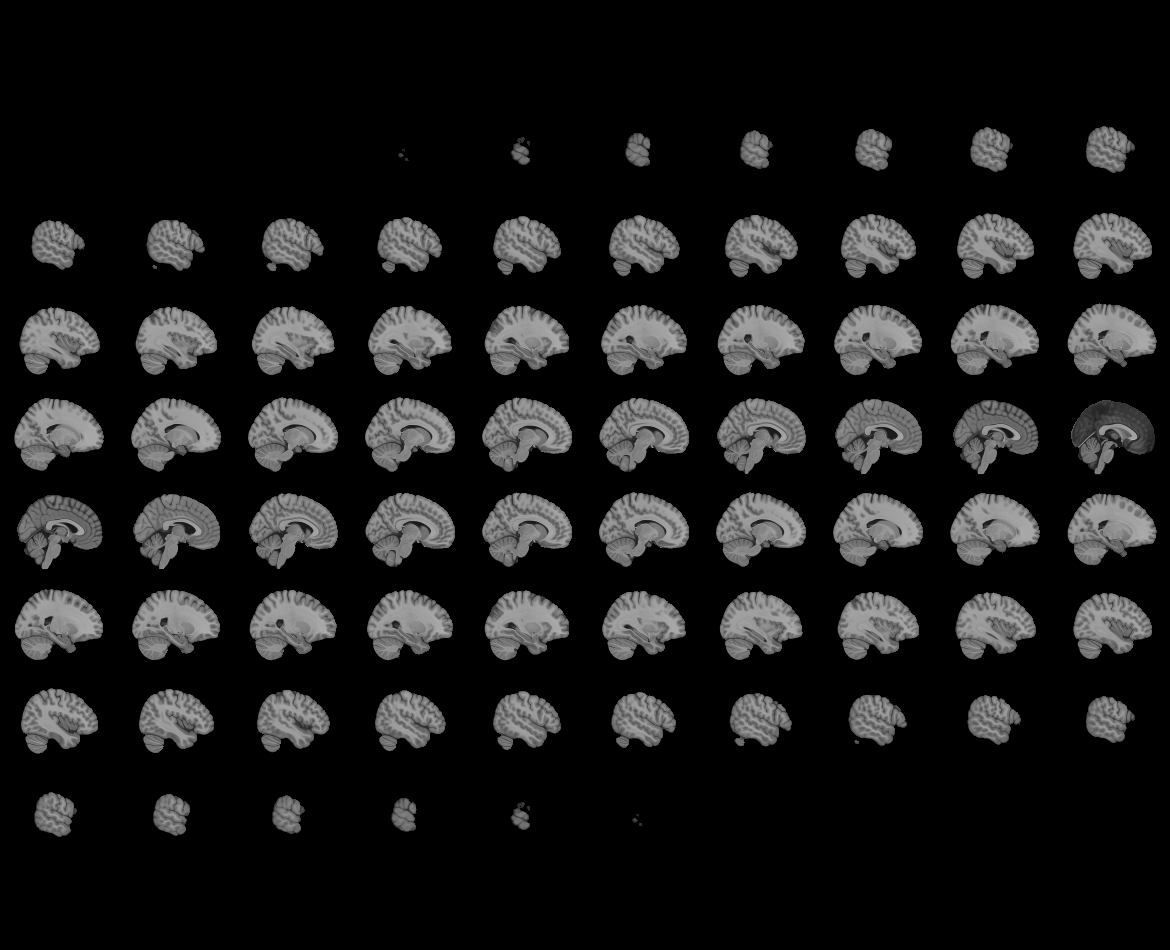
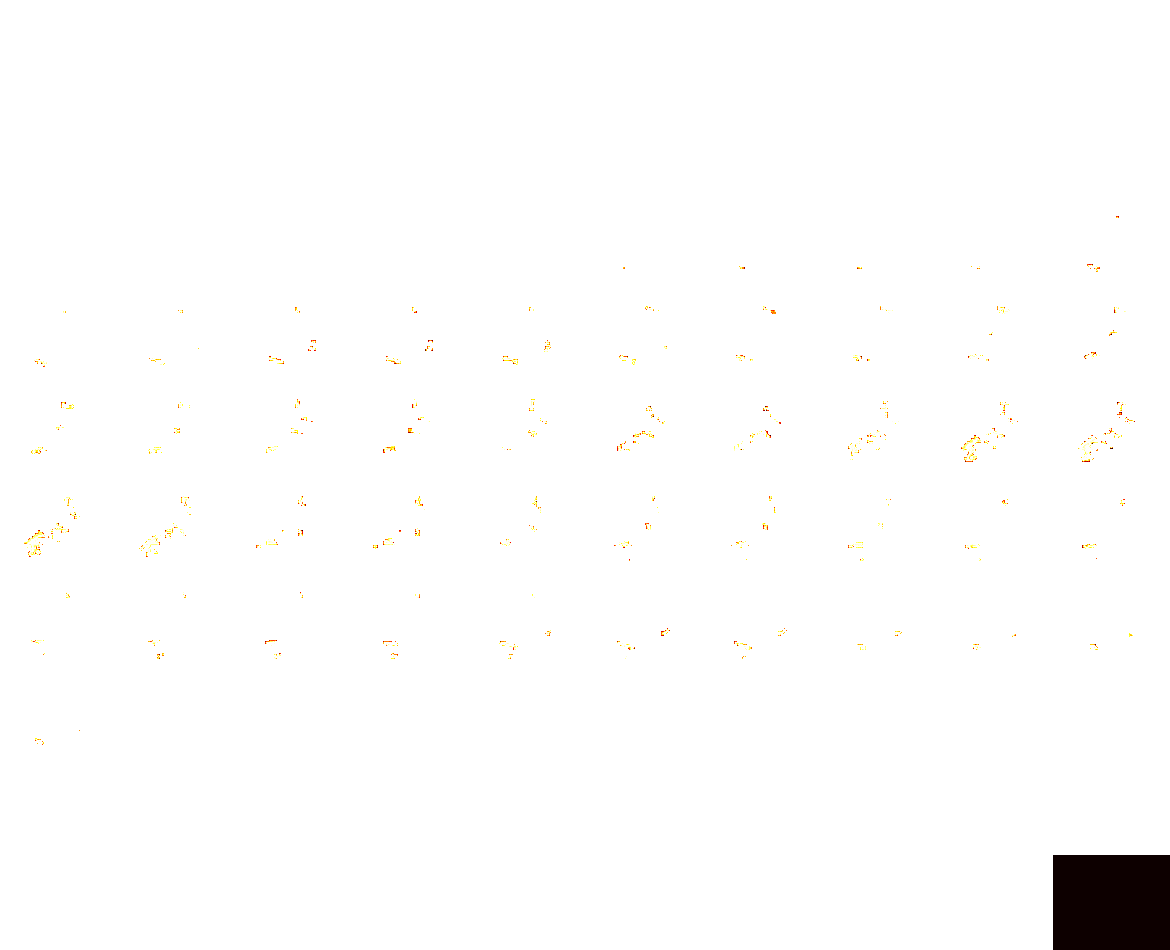

In [84]:
plotting.view_img(
    pos_conj_bin,
    title='Conjunction (Intersection of FPR-Corrected Maps)',
    threshold=0.1 # a small value just for visualization
)

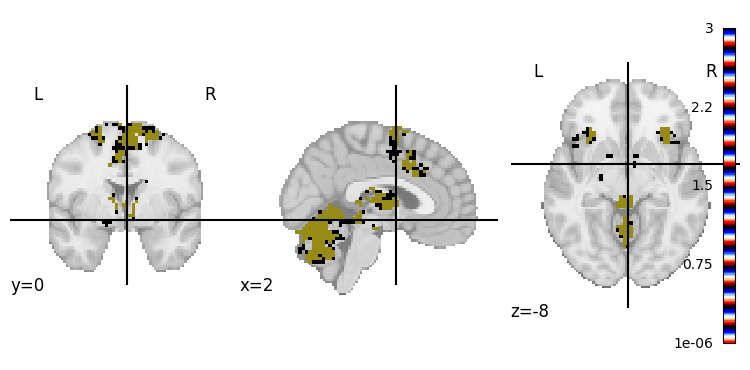

In [82]:
display = plotting.plot_stat_map(conj_func_nii, display_mode='ortho', cut_coords=(2, 0, -8),
                                cmap = 'flag')

# Add the second map as an overlay
display.add_overlay(pos_conj_bin,alpha = 0.6)  # Adjust alpha for transparency

plotting.show()

## finally, do a logical conjunction with NET

++ 3dcalc: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
++ Authored by: A cast of thousands
++ 3dAFNItoNIFTI: AFNI version=AFNI_24.1.02 (Apr 14 2024) [64-bit]
rm: conjunction_arousal_pupil_mask_nilearn_NET+tlrc: No such file or directory


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



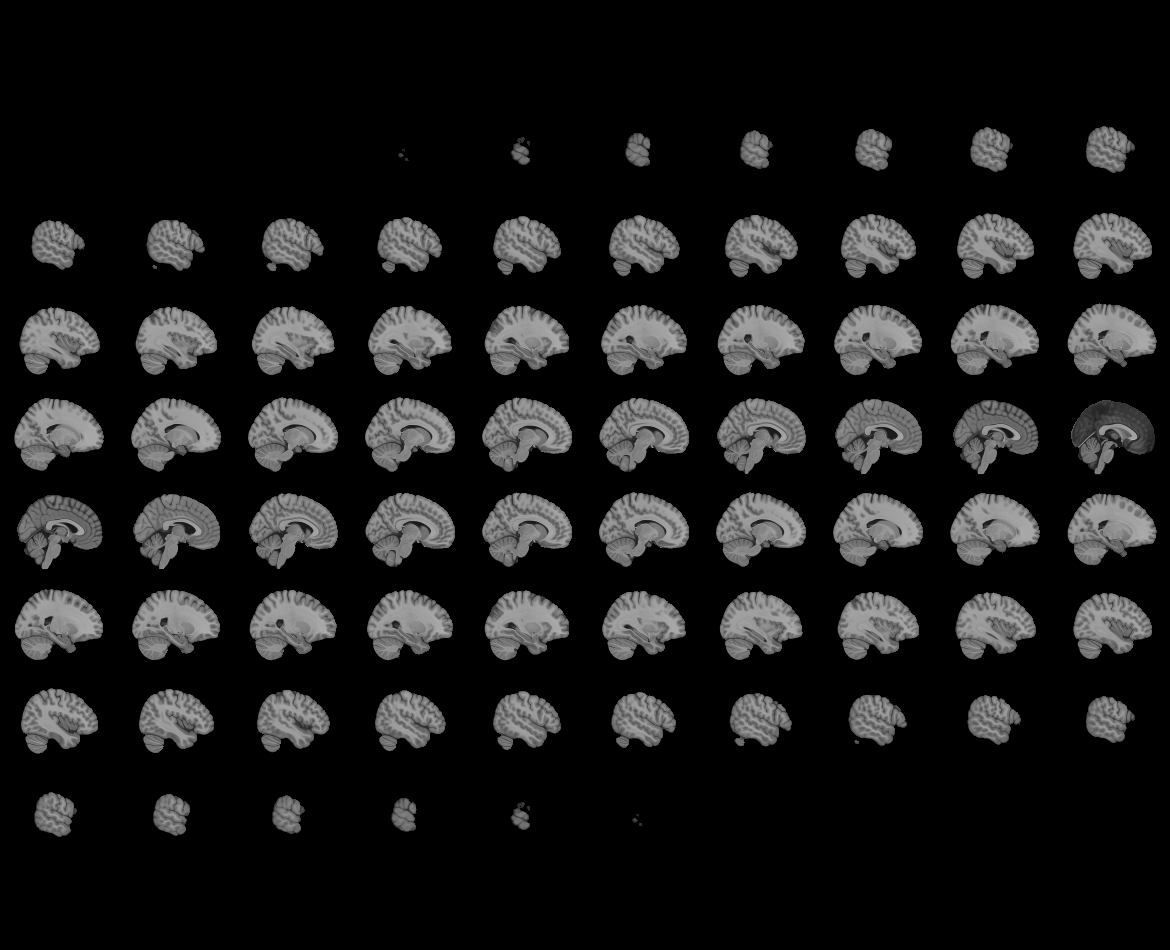
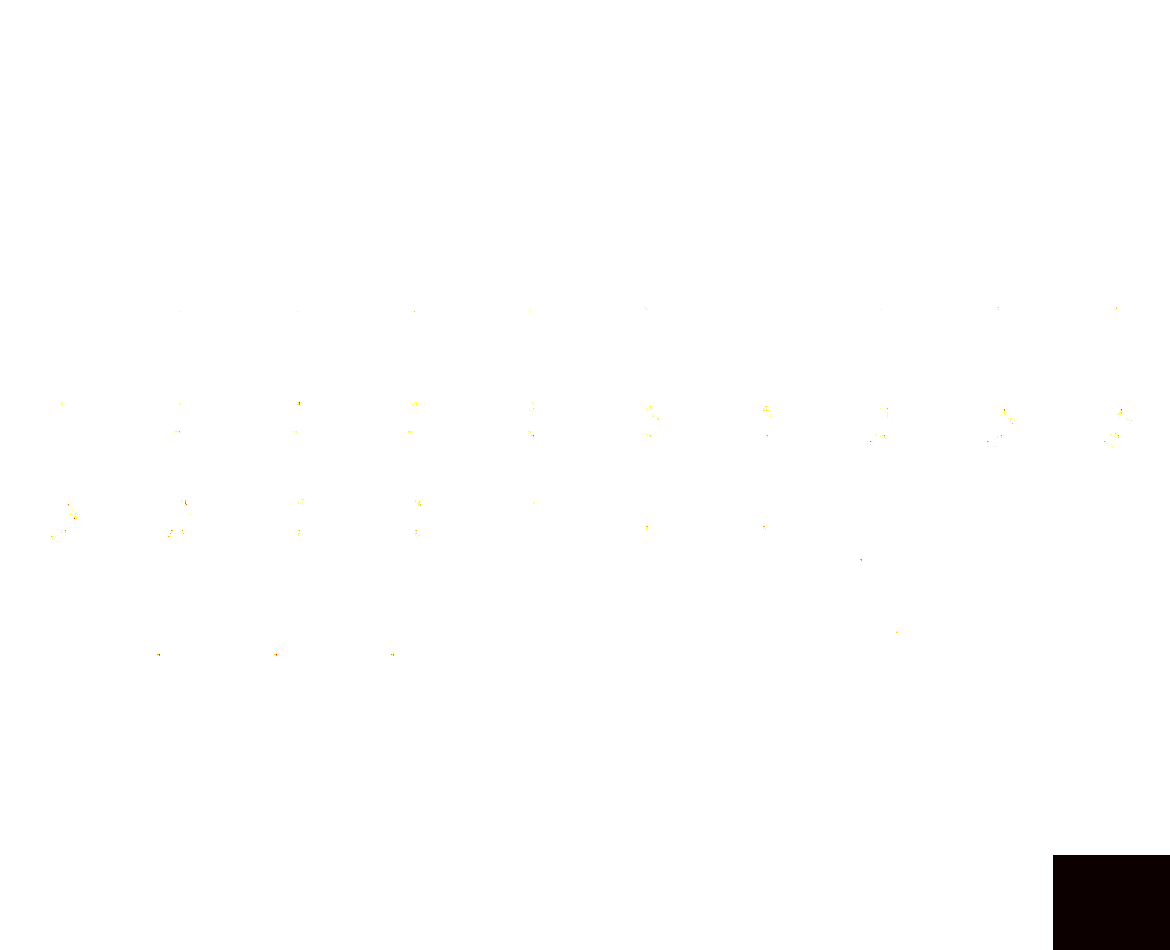

In [93]:

!3dcalc -overwrite -prefix conjunction_arousal_pupil_mask_nilearn_NET -a conjunction_arousal_pupil_mask_nilearn.nii.gz -b Markello_neuromaps/source-ding2010_desc-mrb_space-MNI152_res-2.9mm_feature.nii.gz'[0]' -expr 'step(a) + 2*step(b-0.1)'
!3dAFNItoNIFTI -prefix conjunction_arousal_pupil_mask_nilearn_NET.nii.gz conjunction_arousal_pupil_mask_nilearn_NET+tlrc
!rm conjunction_arousal_pupil_mask_nilearn_NET+tlrc

file='./conjunction_arousal_pupil_mask_nilearn_NET.nii.gz'
conj_func_nii = nib.load(file)
# conj_func_data = conj_func_nii.get_fdata()
# conj_func_data[conj_func_data<2]=0
# conj_func_nii = nib.Nifti1Image(conj_func_data,affine)  # Create the volume image.

plotting.view_img(conj_func_nii,threshold = 2)